In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9428571428571427
P-value: 1.4247676947645743e-07


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.932793841159666e-05


In [7]:
len(weights_unenc_sklearn),len(weights_unenc_paillier)

(15, 15)

In [8]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.8785714285714284
P-value: 1.6315280286544268e-05


In [9]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00018928745300083764


In [10]:
weights_unenc_ckks

[0.01819230045500401,
 0.03549420067544071,
 -0.0034457988251306963,
 0.0016751009888248698,
 0.012462902328897787,
 -0.026463999255102455,
 0.040397899580923685,
 0.0009579004457247776,
 0.012890198396629719,
 -0.022111802137781668,
 0.02601959953803308,
 -0.013952299735048978,
 -0.007130799348484117,
 -0.008884103121138544,
 0.020596097817591037]

In [11]:
weights_unenc_sklearn

array([ 0.01130804,  0.04392499, -0.00238616,  0.00756646,  0.00674956,
       -0.01830878,  0.04206919,  0.02054314,  0.01539711, -0.03862477,
        0.03669319, -0.01181719, -0.00124137, -0.01242723,  0.03086284])

In [12]:
weights_unenc_paillier

[0.011862943105322167,
 0.020363527144495654,
 -0.004406791839405809,
 0.009921538871473016,
 -0.0027265454702074267,
 -0.004828671037263119,
 0.027197329036929854,
 0.012244537839748382,
 0.01720902040101646,
 -0.00854384372862741,
 0.013465366338669075,
 -0.013620156861127183,
 -0.012364102513522547,
 -0.0025668308117947364,
 0.024474366484386646]

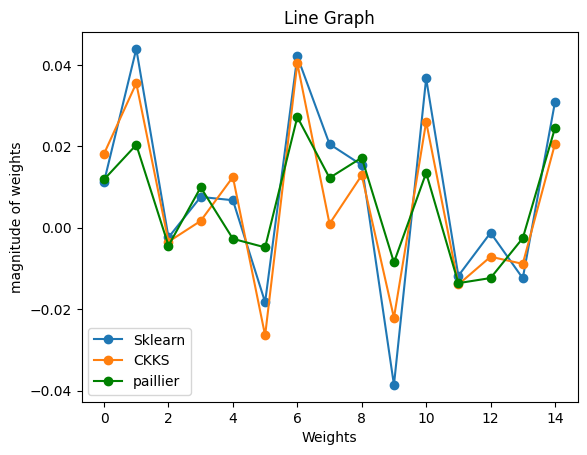

In [13]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

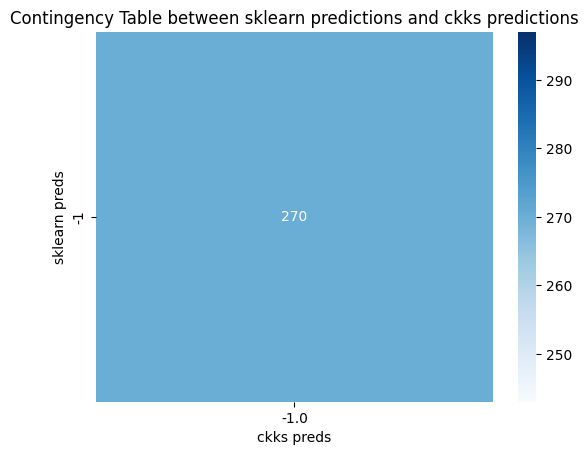

In [14]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

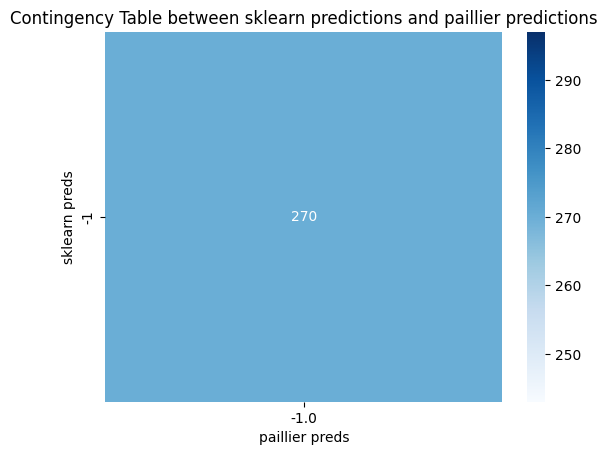

In [15]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

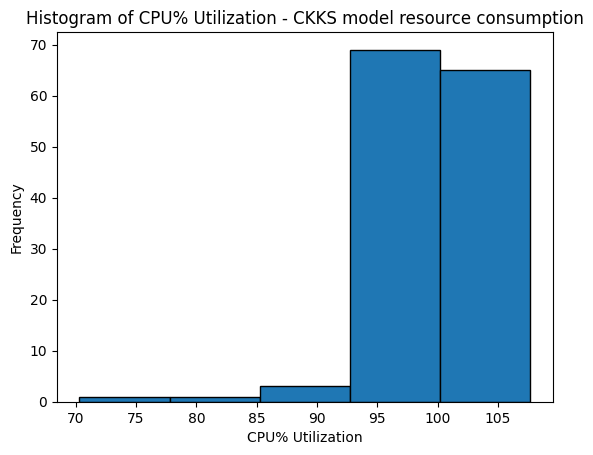

In [16]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [17]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.37841726618706
99.9


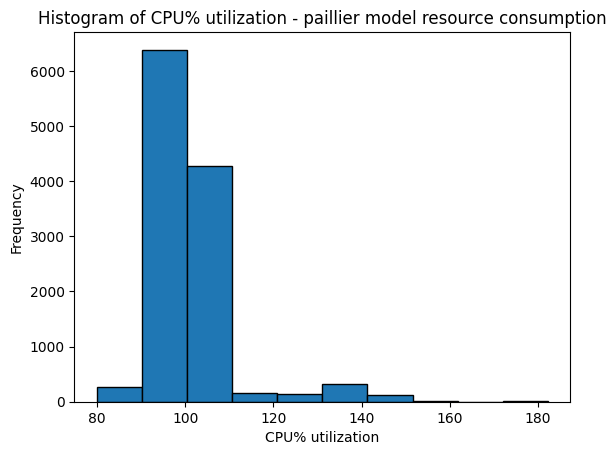

In [18]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [19]:
np.mean(filtered_paillier_cpu_util)

101.62738319356494

Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

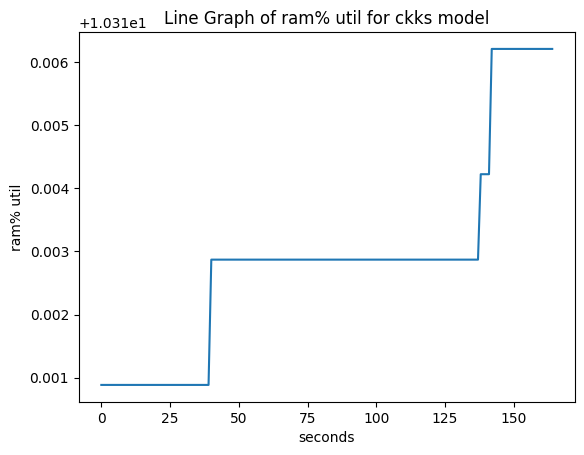

In [20]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [21]:
import numpy as np
np.mean(ram_usages_ckks)

10.312888000456377

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

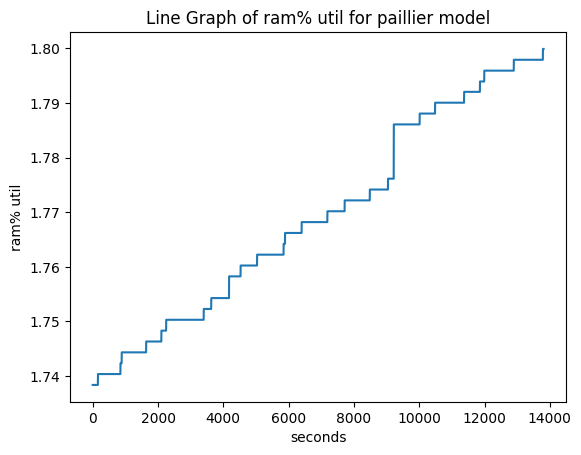

In [22]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [23]:
np.mean(ram_usages_paillier)

1.7694797403818088

In [24]:
np.mean(ram_usages_sklearn)

1.5971164863316913

In [25]:
train_time_ckks

153.81225776672363

In [26]:
train_time_paillier

15544.435092926025

In [27]:
testing_time_ckks

8.343111038208008

In [28]:
testing_time_paillier

642.4846732616425

In [29]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.8481481481481481, 0.8481481481481481, 0.8481481481481481)